In [1]:
pwd

'C:\\Users\\dimit\\Documents\\GitHub\\Time-Series-2---Predicting-air-quality-\\data'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pylab import rcParams
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
rcParams['figure.figsize'] = 11, 9

In [3]:
data = pd.read_csv("AirQualityUCI.csv", sep=";")

In [4]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
data["Datestamp"] = data["Date"] + ' ' + data["Time"]

In [6]:
data["Datestamp"] = pd.to_datetime(data["Datestamp"], format = '%d/%m/%Y %H.%M.%S')

In [7]:
data.set_index(data["Datestamp"])

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Datestamp
Datestamp,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN,2004-03-10 18:00:00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN,2004-03-10 19:00:00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN,2004-03-10 20:00:00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN,2004-03-10 21:00:00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [8]:
data = data.drop(["Unnamed: 15", "Unnamed: 16"], axis=1)

In [9]:
data = data.dropna()

In [10]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datestamp
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [11]:
data = data.dropna().set_index(data["Datestamp"])

In [12]:
dta

NameError: name 'dta' is not defined

In [13]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datestamp
Datestamp,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [14]:
data.isnull().values.sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   object        
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   object        
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   object        
 13  RH             9357 non-null   object        
 14  AH             9357 non-null   objec

In [17]:
data["T"] = data["T"].str.replace(",", ".").astype(float)

In [18]:
data["RH"] = data["RH"].str.replace(",", ".").astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   object        
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   object        
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   objec

In [20]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datestamp
Datestamp,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,"0,7578",2004-03-10 18:00:00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,"0,7255",2004-03-10 19:00:00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,"0,7502",2004-03-10 20:00:00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,"0,7867",2004-03-10 21:00:00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,"0,7888",2004-03-10 22:00:00


In [21]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datestamp
Datestamp,,,,,,,,,,,,,,,,
2005-04-04 10:00:00,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,"0,7568",2005-04-04 10:00:00
2005-04-04 11:00:00,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,"0,7119",2005-04-04 11:00:00
2005-04-04 12:00:00,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,"0,6406",2005-04-04 12:00:00
2005-04-04 13:00:00,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,"0,5139",2005-04-04 13:00:00
2005-04-04 14:00:00,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,"0,5028",2005-04-04 14:00:00


In [22]:
four_hour_data = data.resample("4H").mean()

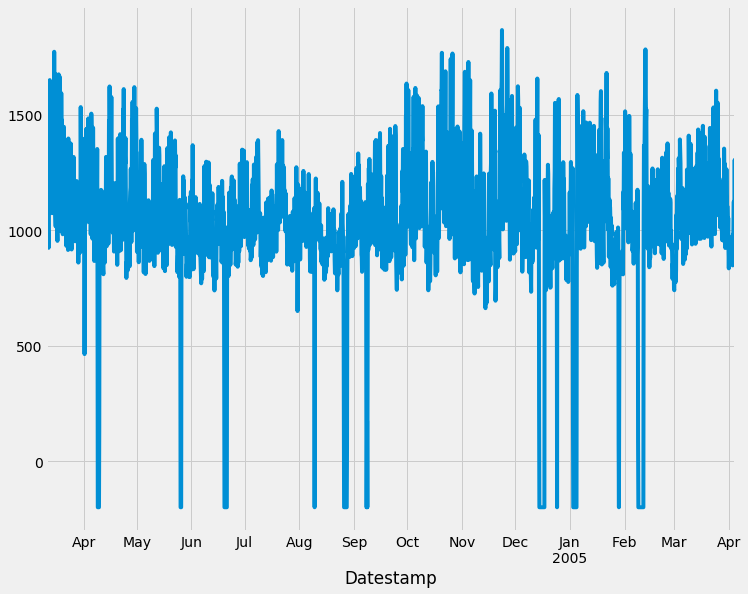

In [25]:
four_hour_data["PT08.S1(CO)"].plot()

In [26]:
four_hour_data["PT08.S1(CO)"] = four_hour_data["PT08.S1(CO)"][four_hour_data["PT08.S1(CO)"] > 500]

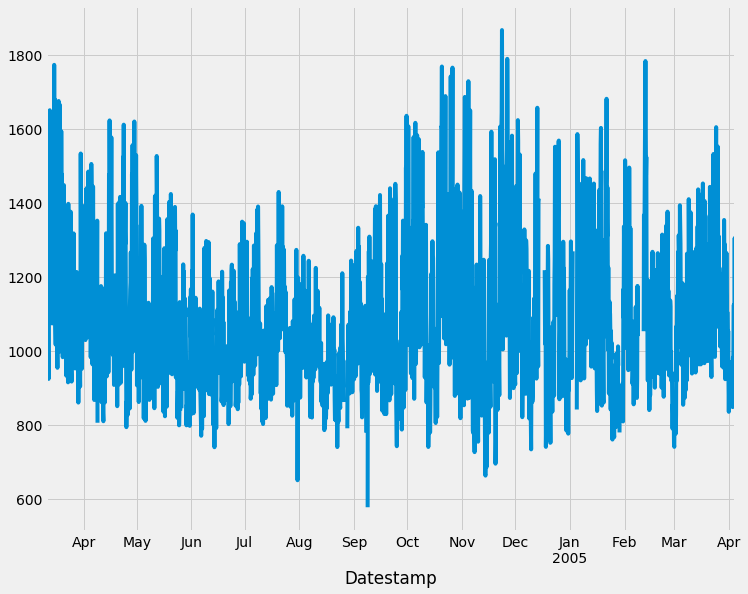

In [27]:
four_hour_data["PT08.S1(CO)"].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021456F20048>,
      dtype=object)

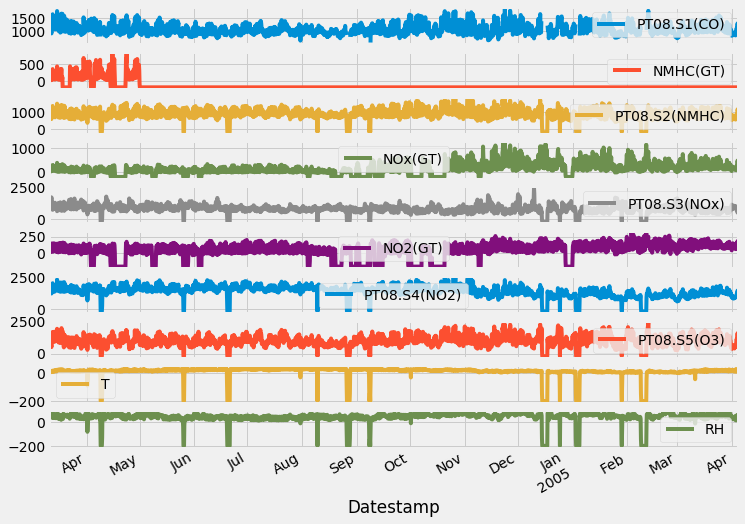

In [29]:
four_hour_data.plot(subplots=True)

In [30]:
rcParams['figure.figsize'] = 11, 16

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002145D878148>,
      dtype=object)

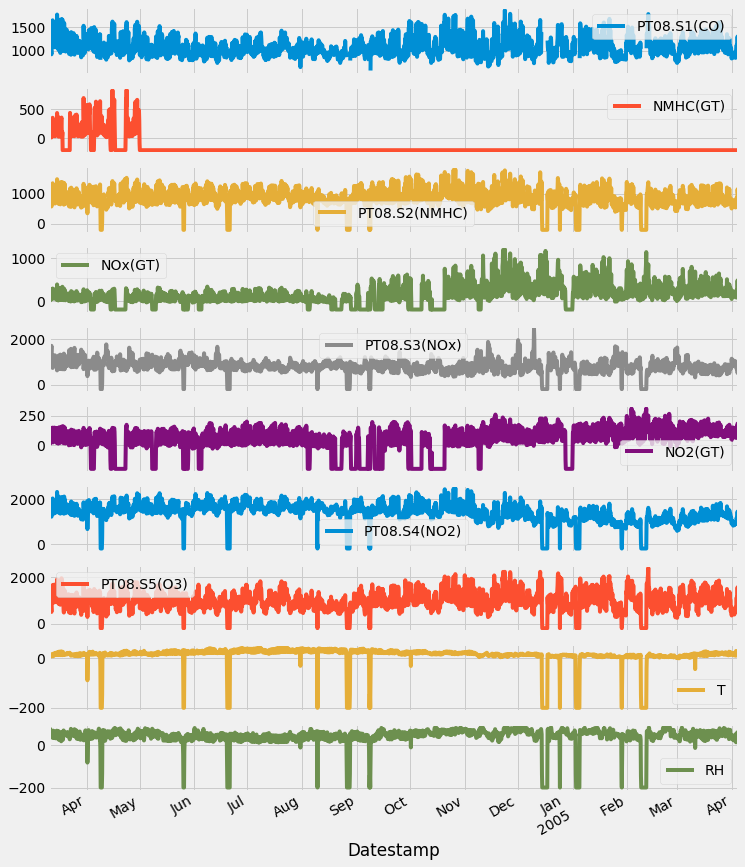

In [31]:
four_hour_data.plot(subplots=True)

In [32]:
four_hour_data = four_hour_data[four_hour_data["T"] > -5]

In [38]:
four_hour_data = four_hour_data[four_hour_data["RH"] > 0]

In [39]:
four_hour_data = four_hour_data[four_hour_data["PT08.S4(NO2)"] > 200]

In [40]:
four_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2236 entries, 2004-03-10 16:00:00 to 2005-04-04 12:00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    2236 non-null   float64
 1   NMHC(GT)       2236 non-null   float64
 2   PT08.S2(NMHC)  2236 non-null   float64
 3   NOx(GT)        2236 non-null   float64
 4   PT08.S3(NOx)   2236 non-null   float64
 5   NO2(GT)        2236 non-null   float64
 6   PT08.S4(NO2)   2236 non-null   float64
 7   PT08.S5(O3)    2236 non-null   float64
 8   T              2236 non-null   float64
 9   RH             2236 non-null   float64
dtypes: float64(10)
memory usage: 192.2 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002145EED5BC8>,
      dtype=object)

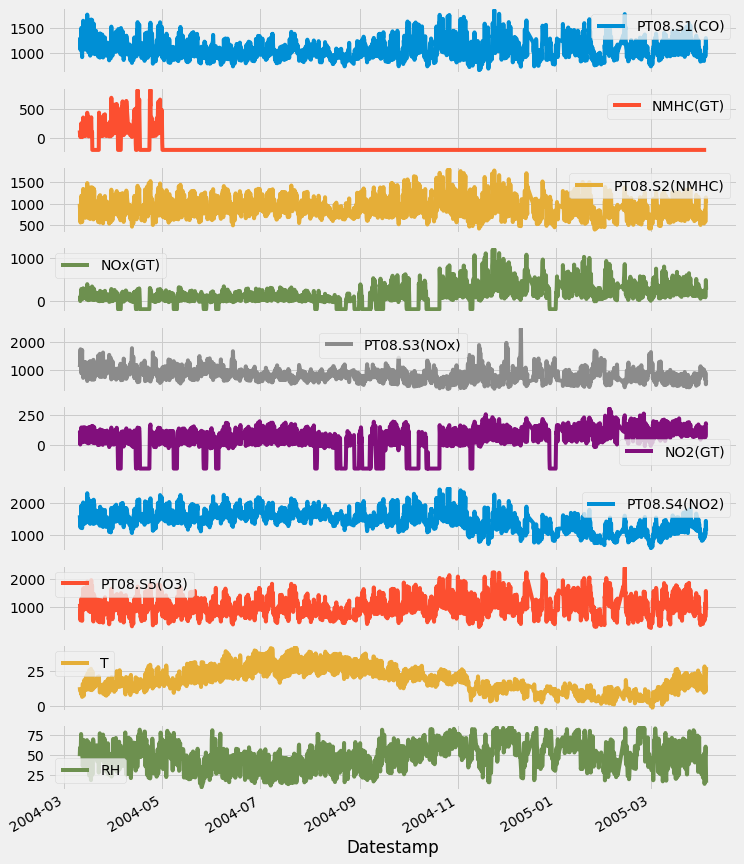

In [41]:
four_hour_data.plot(subplots=True)

In [161]:
transformed = four_hour_data.copy()

In [165]:
from statsmodels.tsa.vector_ar.var_model import VARMAX

ImportError: cannot import name 'VARMAX' from 'statsmodels.tsa.vector_ar.var_model' (C:\Users\dimit\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py)

In [163]:
train = transformed[:int(0.8*(len(transformed)))]
valid = transformed[int(0.8*(len(data))):]

In [169]:
model = VAR(train)
model_fit = model.fit()
model_fit.summary()



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, May, 2020
Time:                     14:46:46
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    73.1601
Nobs:                     1787.00    HQIC:                   72.9470
Log likelihood:          -90313.1    FPE:                4.22974e+31
AIC:                      72.8223    Det(Omega_mle):     3.97797e+31
--------------------------------------------------------------------
Results for equation PT08.S1(CO)
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                  285.883657        76.821013            3.721           0.000
L1.PT08.S1(CO)           0.789638         0.054986           14.361           0.000
L1.NMHC(GT)              0.062593         

In [175]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [176]:
prediction

array([], shape=(0, 10), dtype=float64)